<a href="https://colab.research.google.com/github/kaledai069/Crossword-Solver-A-Neural-Transformer-based-Approach/blob/master/Crossword_Solver_Iterative_Improvement_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!git clone https://github.com/kaledai069/Crossword-Solver-A-Neural-Transformer-based-Approach
%cd Crossword-Solver-A-Neural-Transformer-based-Approach/
!bash inference_setup.sh

Cloning into 'Crossword-Solver-A-Neural-Transformer-based-Approach'...
remote: Enumerating objects: 3102, done.
remote: Counting objects: 100% (1802/1802), done.
remote: Compressing objects: 100% (1428/1428), done.
remote: Total 3102 (delta 477), reused 1688 (delta 370), pack-reused 1300
Receiving objects: 100% (3102/3102), 15.91 MiB | 21.27 MiB/s, done.
Resolving deltas: 100% (671/671), done.
/content/Crossword-Solver-A-Neural-Transformer-based-Approach
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

#### Important Libraries

In [3]:
import datetime
import time
import matplotlib.pyplot as plt
import cv2
import pprint
import shutil
import os

from matplotlib.gridspec import GridSpec
from solver.Crossword import Crossword
from solver.BPSolver import BPSolver
from utils import puz_to_json, fetch_nyt_crossword
from draw_grid import get_grid
from copy import deepcopy
from pprint import pprint

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [4]:
model_path = "/content/gdrive/MyDrive/First Pass Model/distilbert_EPOCHs_7_COMPLETE.bin"
ans_path = "/content/gdrive/MyDrive/First Pass Model/new_answer_list.tsv"
dense_embd_path = "/content/gdrive/MyDrive/First Pass Model/distilbert_embeddings_v2_0.pkl"

t5_reranker_path = "/content/gdrive/MyDrive/Second Pass Model/t5_small_new_dataset_2EPOCHS/"
byt5_reranker_path = "/content/gdrive/MyDrive/Second Pass Model/byt5_reranker/"
reranker_model_type = 't5-small'

In [5]:
def solve(crossword, m_path, a_path, d_path, r_path, reranker_m_type, max_candidate = 50000, score_threshold = 0.5):
    solver = BPSolver(
                      crossword,
                      model_path = m_path,
                      ans_tsv_path = a_path,
                      dense_embd_path = d_path,
                      reranker_path = r_path,
                      reranker_model_type = reranker_m_type,
                      max_candidates = max_candidate,
                      score_improvement_threshold = score_threshold
                      )

    solution = solver.solve(num_iters = 60, iterative_improvement_steps = 5)
    return solution

#### Iterative Improvment Visualization on Single Dates:

In [6]:
def ordinal(number):
    if 10 <= number % 100 <= 20:
        suffix = 'th'
    else:
        suffix = {1: 'st', 2: 'nd', 3: 'rd'}.get(number % 10, 'th')
    return str(number) + suffix

In [9]:
selected_date = datetime.date(2021, 1, 21)
formatted_date = selected_date.strftime("%m/%d/%Y")
puzzle = fetch_nyt_crossword(formatted_date)

crossword = Crossword(puzzle)
start_t = time.time()
output = solve(crossword, model_path, ans_path, dense_embd_path, t5_reranker_path, "t5-small", 50000, 0.5)
end_t = time.time()
print(f"Total time taken: ", end_t - start_t)


Beginning Belief Propagation iteration steps


100%|███████████████████████████████████████████████████████████████| 60/60 [00:14<00:00,  4.05it/s]


Belief Propagation iteration complete

Before Iterative Improvement with t5-small: Letters Correct: 98.93048128342245% | Words Correct: 93.42105263157895%
t5-small


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

----------------------------------------------------------------------------------------------------
Starting Iterative Improvement with T5-small
1th iteration: Letters Correct: 99.46524064171123% | Words Correct: 94.73684210526315%
2th iteration: Letters Correct: 99.46524064171123% | Words Correct: 94.73684210526315%

After Iterative Improvement with t5-small: Letters Correct: 99.46524064171123% | Words Correct: 94.73684210526315%
Total time taken for t5-small: 104.63481426239014 seconds
----------------------------------------------------------------------------------------------------

Starting last refinement step: 
Total times the second pass model is called: 1771
Total time taken:  210.34841990470886


In [11]:
output

{'first pass model': {'grid': [['H',
    'A',
    'B',
    'I',
    'B',
    0,
    'S',
    'N',
    'A',
    'P',
    0,
    'E',
    'D',
    'S',
    0],
   ['A', 'M', 'A', 'R', 'O', 0, 'C', 'A', 'N', 'I', 0, 'V', 'E', 'T', 'S'],
   ['M', 'O', 'D', 'E', 'R', 'N', 'I', 'S', 'T', 'S', 0, 'I', 'C', 'E', 'E'],
   ['M', 'E', 'T', 0, 'I', 'C', 'E', 0, 'I', 'M', 'A', 'L', 'O', 'N', 'E'],
   [0, 'B', 'A', 'R', 'T', 'O', 'N', 0, 0, 'O', 'D', 'E', 'D', 'O', 'N'],
   ['C', 'O', 'K', 'I', 'E', 0, 'T', 'S', 'P', 0, 'D', 'Y', 'E', 'S', 0],
   ['D', 'I', 'E', 'D', 'N', 'S', 'I', 'T', 'U', 'A', 'T', 'E', 0, 0, 0],
   ['C', 'D', 'S', 0, 'Y', 'E', 'S', 'O', 'R', 'N', 'O', 0, 'M', 'F', 'R'],
   [0, 0, 0, 'C', 'A', 'S', 'T', 'L', 'E', 'S', 'S', 'A', 'R', 'E', 'A'],
   [0, 'A', 'C', 'H', 'Y', 0, 'S', 'E', 'C', 0, 'B', 'I', 'P', 'E', 'D'],
   ['P', 'R', 'O', 'A', 'M', 'S', 0, 'S', 'H', 'A', 'I', 'L', 'E', 'D', 0],
   ['D', 'E', 'G', 'R', 'E', 'E', 'S', 0, 'A', 'U', 'G', 0, 'A', 'B', 'E'],
   ['A', 'N', 

15 15
(259, 15)
15 15
(259, 15)
15 15
(259, 15)


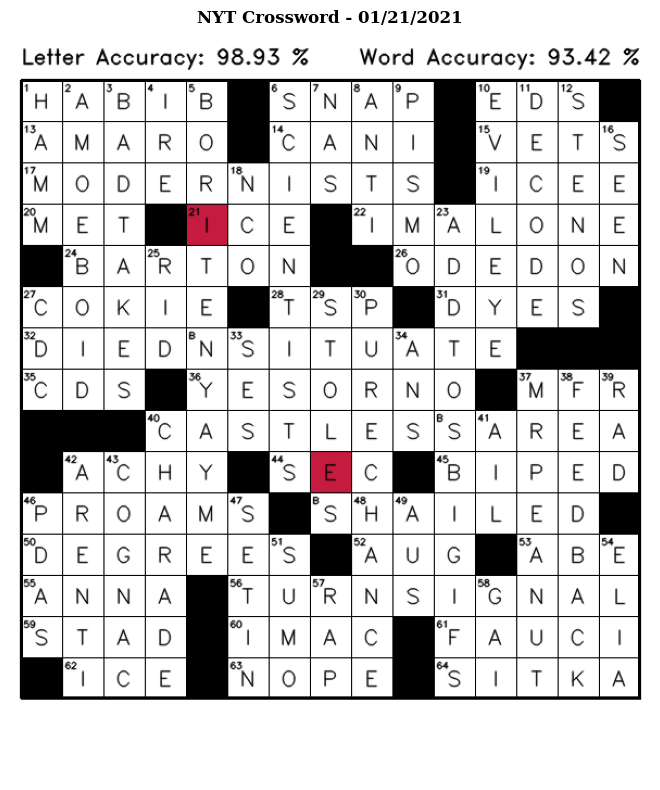

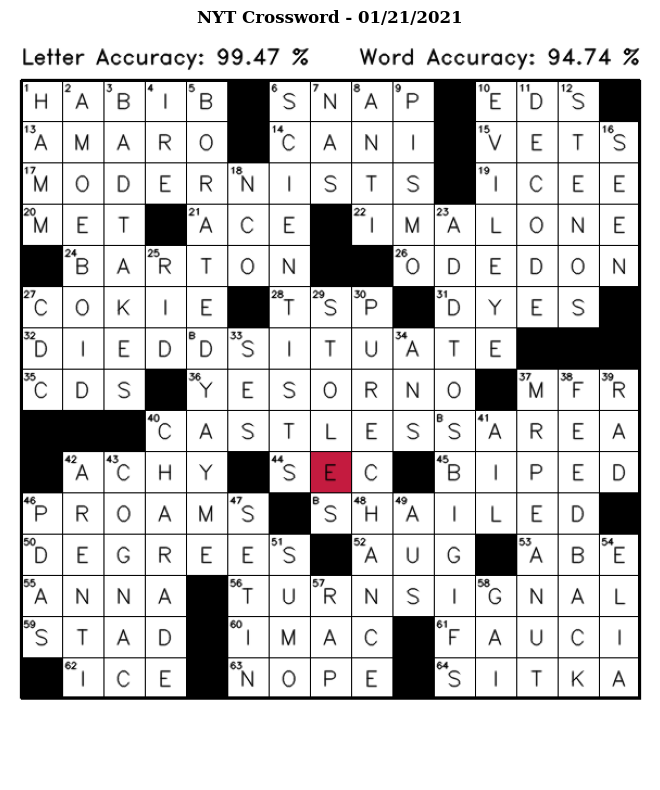

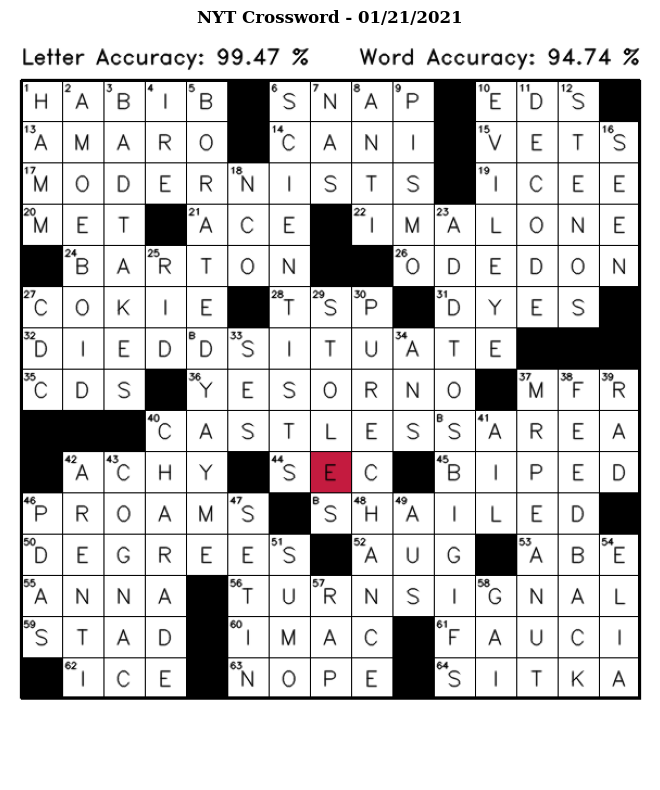

In [10]:
grid_img_solutions = []

title_name = f"NYT Crossword - {formatted_date}"
first_pass_solution = output['first pass model']['grid']
lett_accu, word_accu = output['first pass model']['letter accuracy'], output['first pass model']['word accuracy']
accuracy_list = [lett_accu, word_accu]
first_pass_img = get_grid(first_pass_solution, puzzle, accuracy_list)

grid_img_solutions = [(first_pass_img, 'first_pass')]

if 'second pass model' in output.keys():
    all_letter_accuracy = output['second pass model']['all letter accuracy']
    all_word_accuracy = output['second pass model']['all word accuracy']

    for i, II_grid in enumerate(output['second pass model']['all grids']):
        II_grid_letter = all_letter_accuracy[i]
        II_grid_word = all_word_accuracy[i]
        II_img_grid = get_grid(II_grid, puzzle, [II_grid_letter, II_grid_word])
        grid_img_solutions.append((II_img_grid, f"second_pass_{ordinal(i+1)}_II"))

output_dir = "/content/gdrive/MyDrive/Solver Outputs"
for grid_img, output_type in grid_img_solutions:
    img_grid = cv2.cvtColor(grid_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (8, 8))
    plt.imshow(img_grid)
    plt.title(title_name, font = {'family':'serif', 'size': '12', 'weight': 'bold'})
    plt.axis('off')
    output_path = os.path.join(output_dir, f"{title_name.replace('/', '-').replace(' ', '')}-{output_type}.png")
    plt.savefig(output_path, dpi = 360, bbox_inches = 'tight')
    plt.tight_layout()
    plt.show()

In [91]:
date_strings = ["07/27/2023", "11/25/2023", "12/10/2023", "09/15/2023"]

date_list = []
for date_str in date_strings:
    month, day, year = [int(d) for d in date_str.split('/')]
    date_list.append(datetime.date(year, month, day))

[datetime.date(2023, 7, 27),
 datetime.date(2023, 11, 25),
 datetime.date(2023, 12, 10),
 datetime.date(2023, 9, 15)]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



Beginning Belief Propagation iteration steps


100%|███████████████████████████████████████████████████████████████| 60/60 [00:12<00:00,  4.84it/s]


Belief Propagation iteration complete

Before Iterative Improvement with t5-small: Letters Correct: 97.83783783783784% | Words Correct: 92.3076923076923%
google/byt5-small


tokenizer_config.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

----------------------------------------------------------------------------------------------------
Starting Iterative Improvement with T5-small
1th iteration: Letters Correct: 99.45945945945947% | Words Correct: 97.43589743589743%
2th iteration: Letters Correct: 100.0% | Words Correct: 100.0%

After Iterative Improvement with t5-small: Letters Correct: 100.0% | Words Correct: 100.0%
Total time taken for t5-small: 119.72939682006836 seconds
----------------------------------------------------------------------------------------------------

Starting last refinement step: 
Total times the second pass model is called: 3957
Total time taken:  262.607857465744
15 15
(259, 15)
15 15
(259, 15)
15 15
(272, 15)


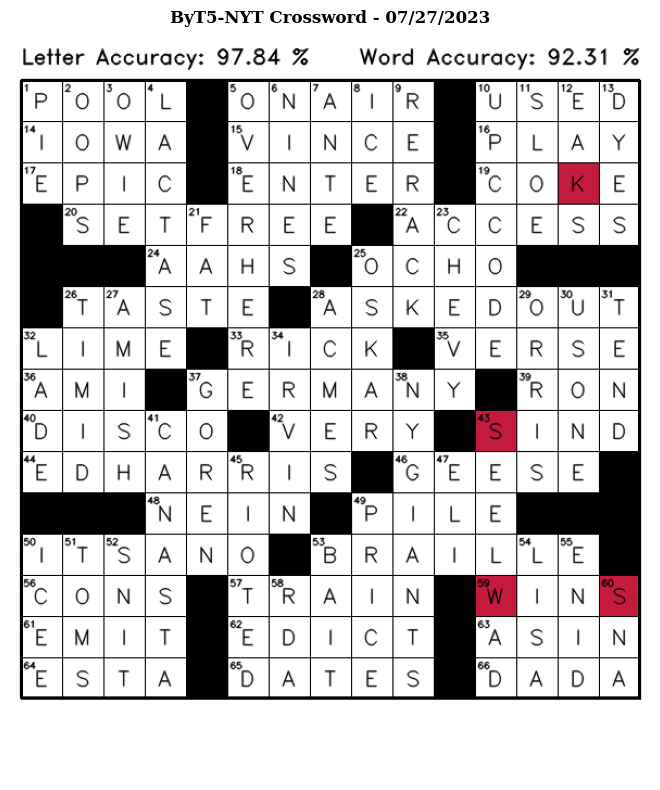

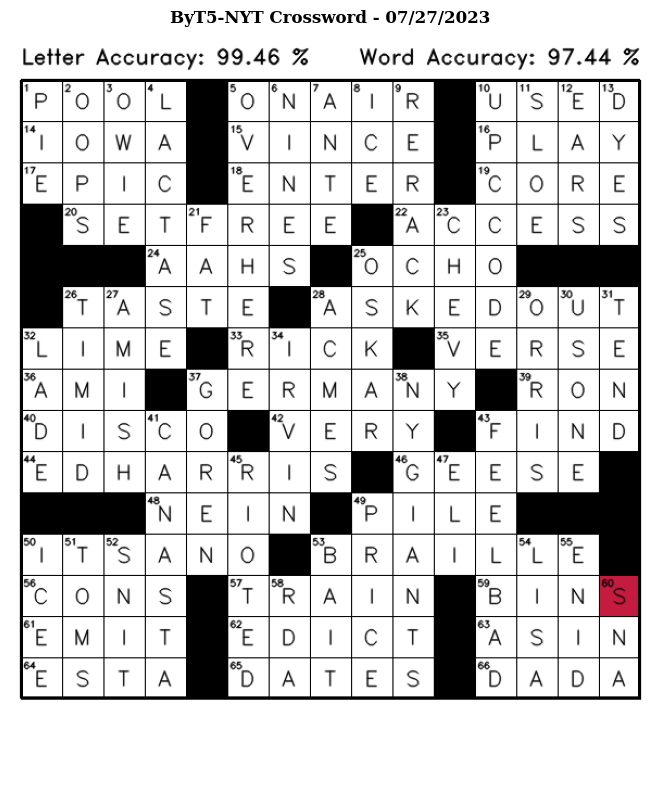

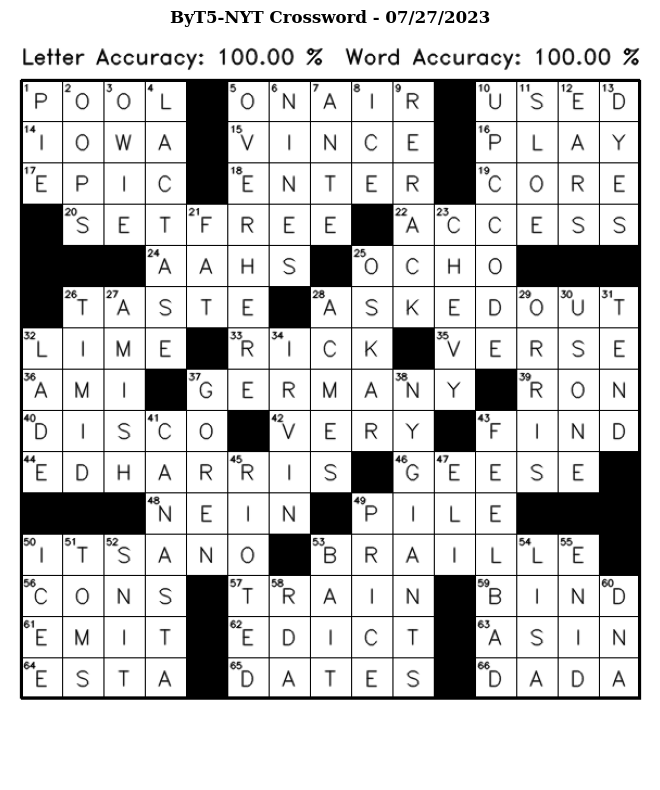


Beginning Belief Propagation iteration steps


100%|███████████████████████████████████████████████████████████████| 60/60 [00:13<00:00,  4.60it/s]


Belief Propagation iteration complete

Before Iterative Improvement with t5-small: Letters Correct: 97.38219895287958% | Words Correct: 91.17647058823529%
google/byt5-small
----------------------------------------------------------------------------------------------------
Starting Iterative Improvement with T5-small
1th iteration: Letters Correct: 99.47643979057592% | Words Correct: 97.05882352941177%
2th iteration: Letters Correct: 100.0% | Words Correct: 100.0%

After Iterative Improvement with t5-small: Letters Correct: 100.0% | Words Correct: 100.0%
Total time taken for t5-small: 144.6623477935791 seconds
----------------------------------------------------------------------------------------------------

Starting last refinement step: 
Total times the second pass model is called: 4228
Total time taken:  230.70596385002136
15 15
(259, 15)
15 15
(259, 15)
15 15
(272, 15)


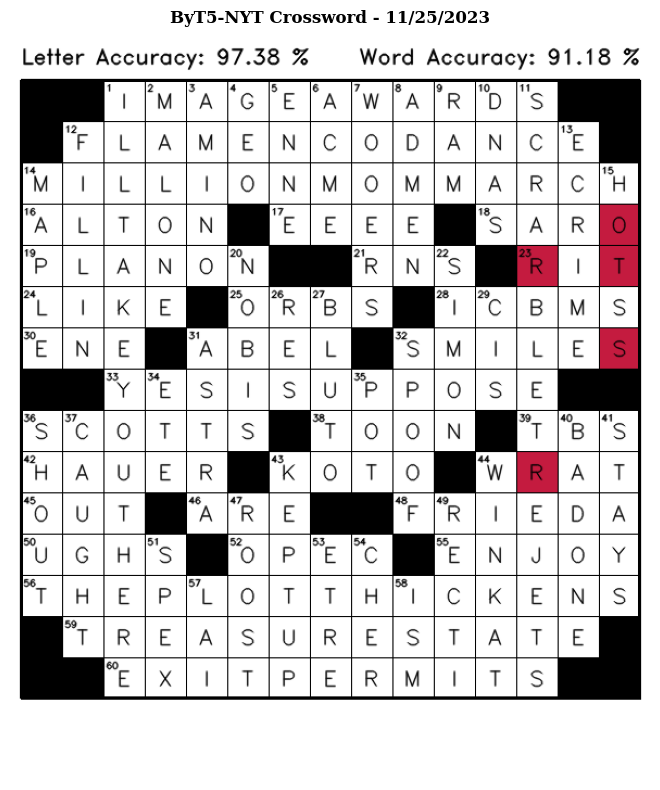

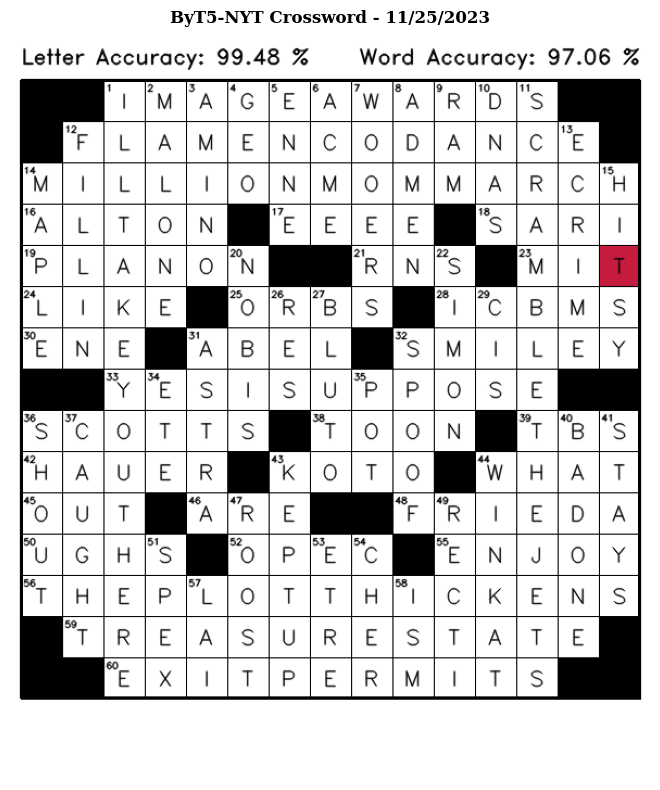

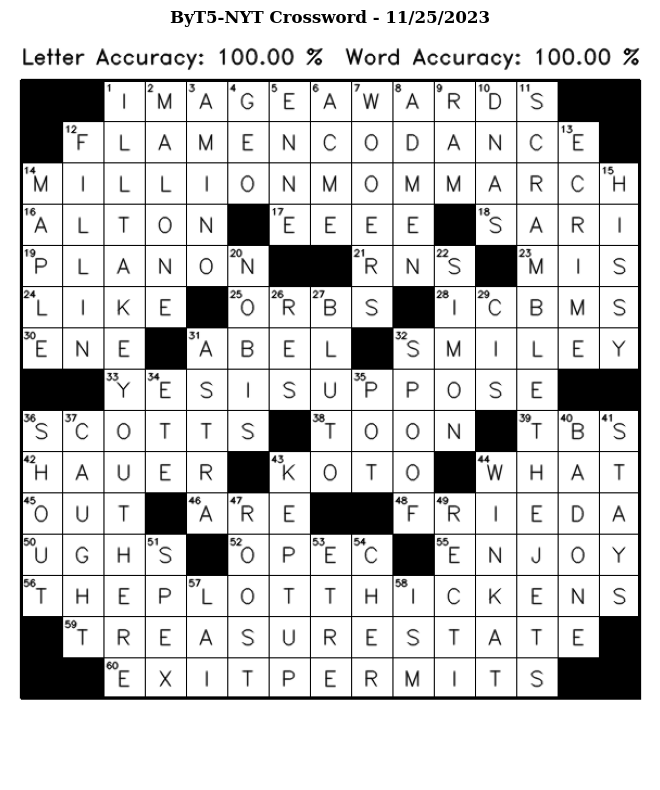


Beginning Belief Propagation iteration steps


100%|███████████████████████████████████████████████████████████████| 60/60 [00:23<00:00,  2.54it/s]


Belief Propagation iteration complete

Before Iterative Improvement with t5-small: Letters Correct: 98.88579387186628% | Words Correct: 95.71428571428572%
google/byt5-small
----------------------------------------------------------------------------------------------------
Starting Iterative Improvement with T5-small
1th iteration: Letters Correct: 100.0% | Words Correct: 100.0%

After Iterative Improvement with t5-small: Letters Correct: 100.0% | Words Correct: 100.0%
Total time taken for t5-small: 713.6263589859009 seconds
----------------------------------------------------------------------------------------------------

Starting last refinement step: 
Total times the second pass model is called: 5301
Total time taken:  826.6413862705231
21 21
(259, 15)
21 21
(272, 15)


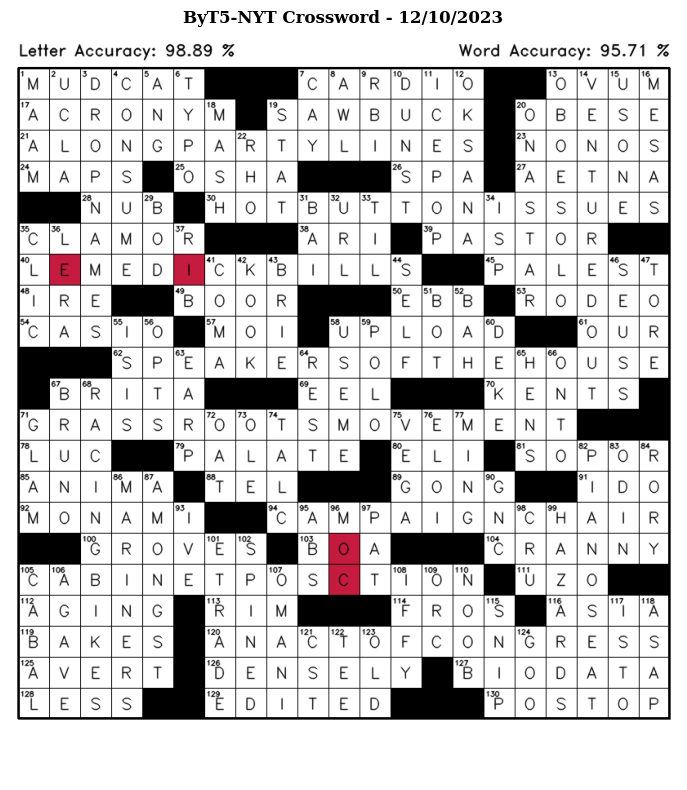

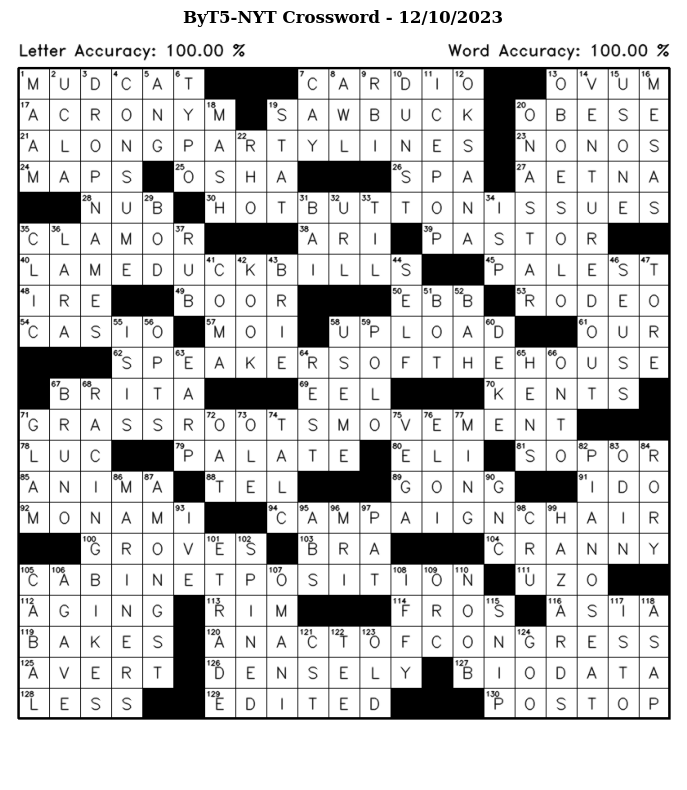


Beginning Belief Propagation iteration steps


100%|███████████████████████████████████████████████████████████████| 60/60 [00:14<00:00,  4.12it/s]


Belief Propagation iteration complete

Before Iterative Improvement with t5-small: Letters Correct: 97.89473684210527% | Words Correct: 90.32258064516128%
google/byt5-small
----------------------------------------------------------------------------------------------------
Starting Iterative Improvement with T5-small
1th iteration: Letters Correct: 99.47368421052632% | Words Correct: 96.7741935483871%
2th iteration: Letters Correct: 100.0% | Words Correct: 100.0%

After Iterative Improvement with t5-small: Letters Correct: 100.0% | Words Correct: 100.0%
Total time taken for t5-small: 285.83616733551025 seconds
----------------------------------------------------------------------------------------------------

Starting last refinement step: 
Total times the second pass model is called: 5907
Total time taken:  370.7864270210266
15 15
(259, 15)
15 15
(259, 15)
15 15
(272, 15)


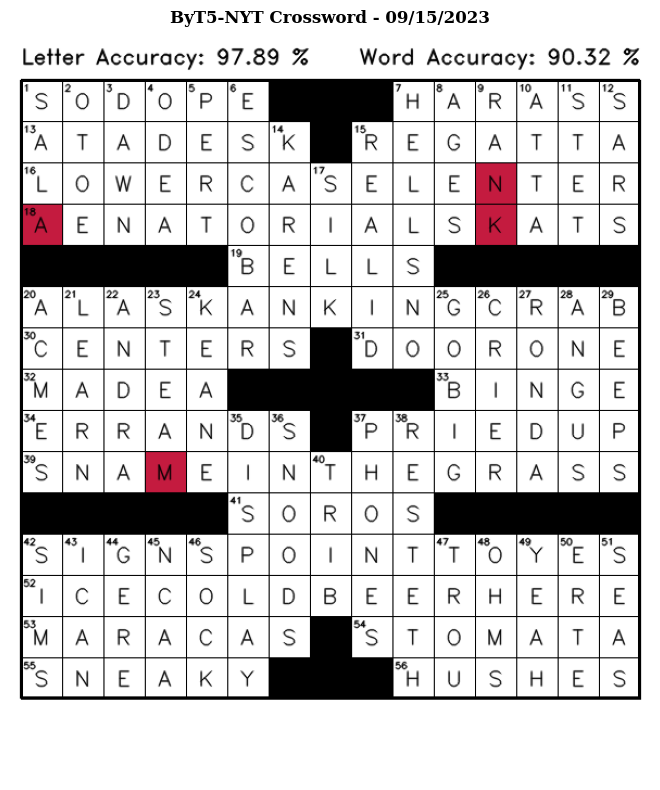

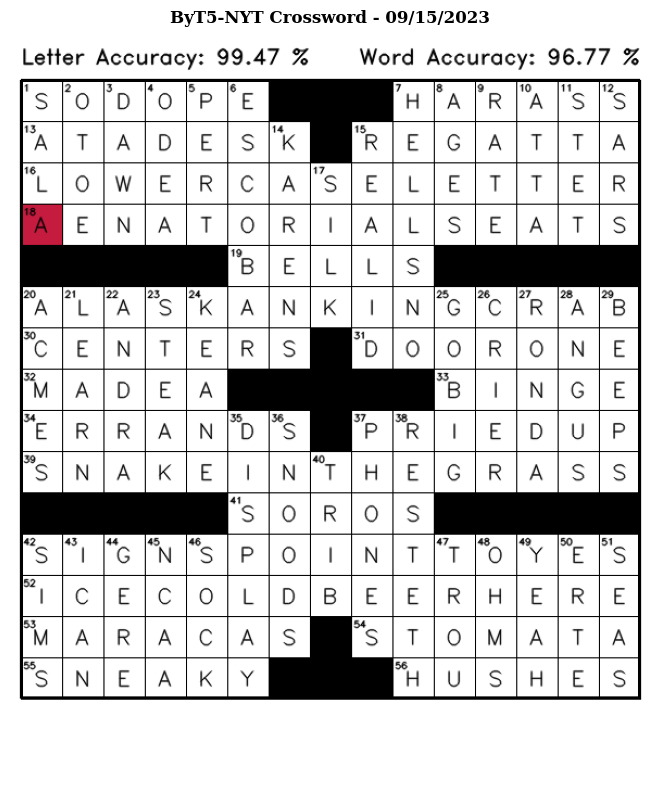

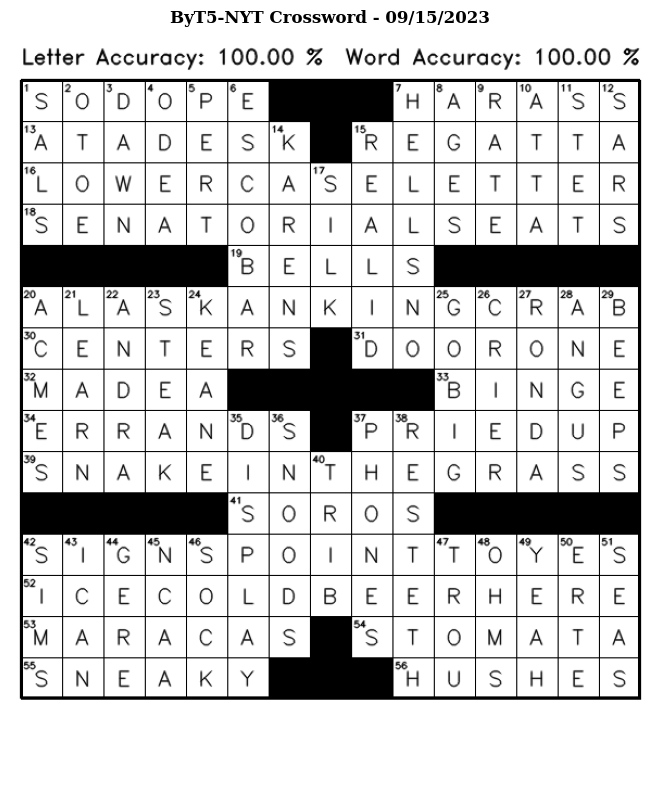

In [93]:
for date in date_list:
    # selected_date = datetime.date(2021, 1, 21)
    formatted_date = date.strftime("%m/%d/%Y")
    puzzle = fetch_nyt_crossword(formatted_date)

    crossword = Crossword(puzzle)
    start_t = time.time()
    output = solve(crossword, model_path, ans_path, dense_embd_path, byt5_reranker_path, "google/byt5-small", 50000, 0.5)
    end_t = time.time()
    print(f"Total time taken: ", end_t - start_t)

    grid_img_solutions = []

    title_name = f"ByT5-NYT Crossword - {formatted_date}"
    first_pass_solution = output['first pass model']['grid']
    lett_accu, word_accu = output['first pass model']['letter accuracy'], output['first pass model']['word accuracy']
    accuracy_list = [lett_accu, word_accu]
    first_pass_img = get_grid(first_pass_solution, puzzle, accuracy_list)

    grid_img_solutions = [(first_pass_img, 'first_pass')]

    if 'second pass model' in output.keys():
        all_letter_accuracy = output['second pass model']['all letter accuracy']
        all_word_accuracy = output['second pass model']['all word accuracy']

        for i, II_grid in enumerate(output['second pass model']['all grids']):
            II_grid_letter = all_letter_accuracy[i]
            II_grid_word = all_word_accuracy[i]
            II_img_grid = get_grid(II_grid, puzzle, [II_grid_letter, II_grid_word])
            grid_img_solutions.append((II_img_grid, f"second_pass_{ordinal(i+1)}_II"))

    output_dir = "/content/gdrive/MyDrive/Solver Outputs"
    for grid_img, output_type in grid_img_solutions:
        img_grid = cv2.cvtColor(grid_img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize = (8, 8))
        plt.imshow(img_grid)
        plt.title(title_name, font = {'family':'serif', 'size': '12', 'weight': 'bold'})
        plt.axis('off')
        output_path = os.path.join(output_dir, f"{title_name.replace('/', '-').replace(' ', '')}-{output_type}.png")
        plt.savefig(output_path, dpi = 360, bbox_inches = 'tight')
        plt.tight_layout()
        plt.show()

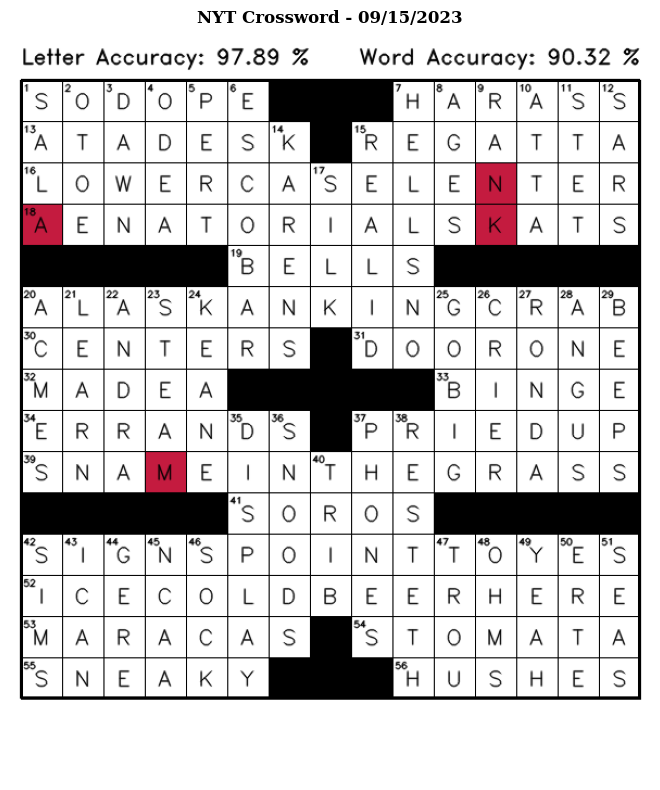

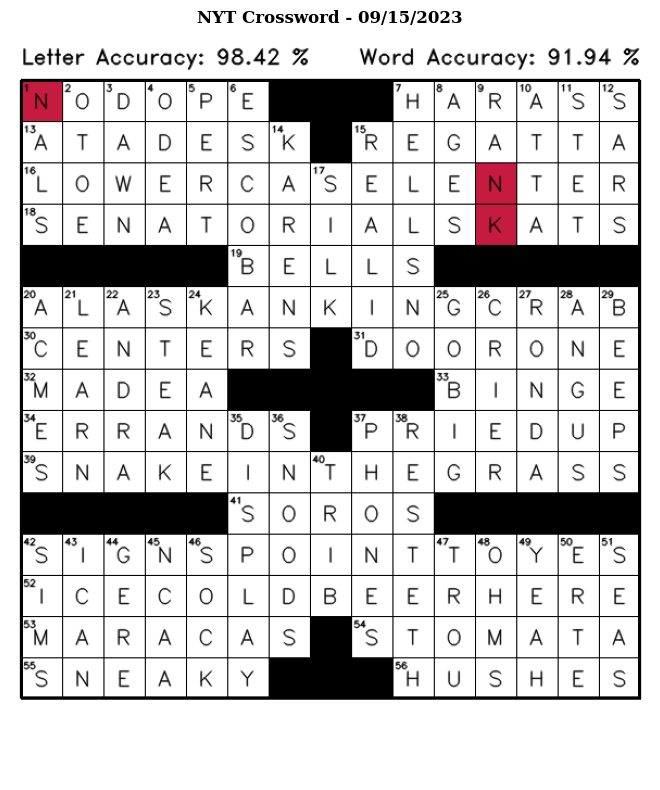

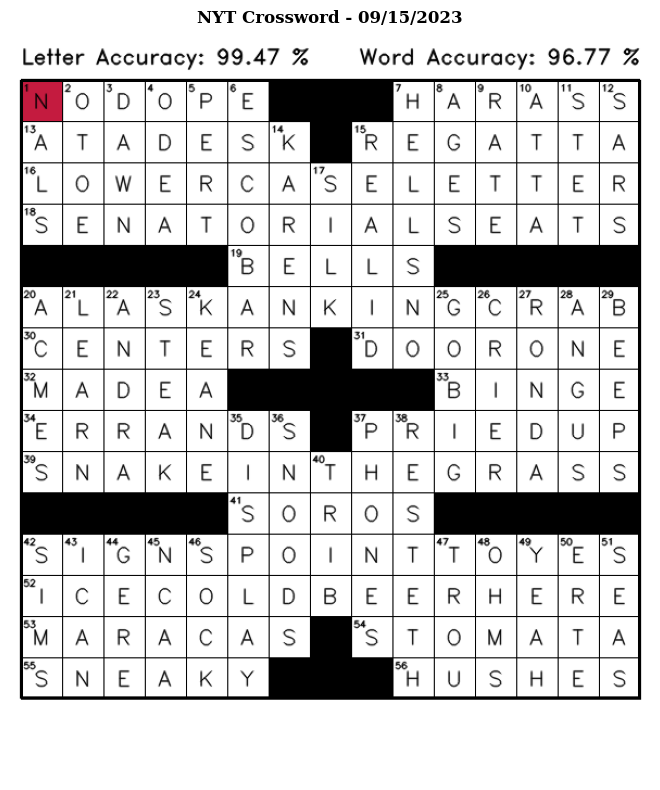

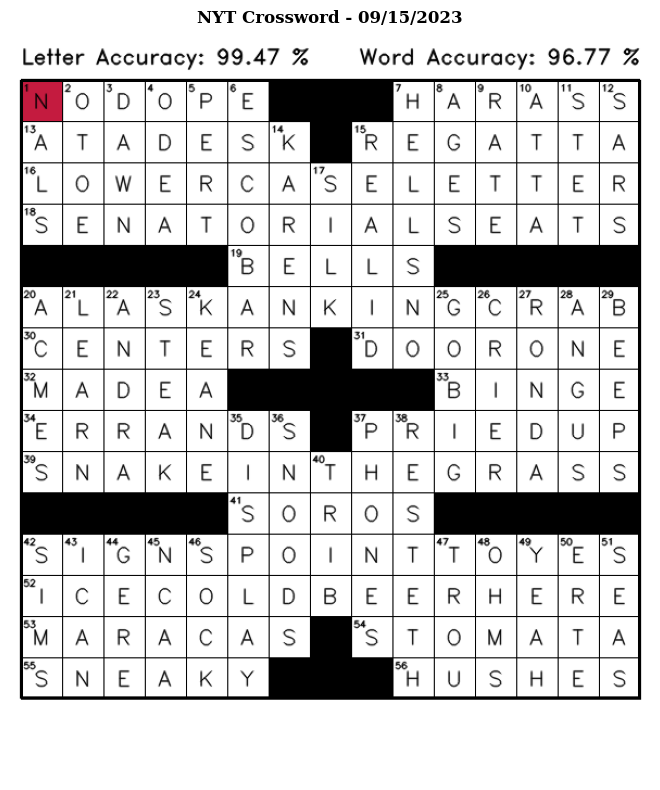

In [89]:
output_dir = "/content/gdrive/MyDrive/Solver Outputs"
for grid_img, output_type in grid_img_solutions:
    img_grid = cv2.cvtColor(grid_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (8, 8))
    plt.imshow(img_grid)
    plt.title(title_name, font = {'family':'serif', 'size': '12', 'weight': 'bold'})
    plt.axis('off')
    output_path = os.path.join(output_dir, f"{title_name.replace('/', '-').replace(' ', '')}-{output_type}.png")
    plt.savefig(output_path, dpi = 360, bbox_inches = 'tight')
    plt.tight_layout()
    plt.show()